In [23]:
import pandas as pd
from importlib import reload
import sys
sys.path.append("../../code/")
import annotation#
import quantification
pd.set_option('display.max_rows', 500)

In [24]:
alternation_set = ["erstellen", "eintragen", "tragen", "speichern", "hinzufügen", "fügen", "markieren", "planen", "vereinbaren"] 

In [25]:
alternating = "alternating_Terminerstellung"

# Annotation

In [26]:
#load a df which features the column "alternating"
df = pd.read_csv("../VACC.csv", sep=",", index_col=0, na_filter=False)
len(df[df[alternating]=="yes"])

330

In [27]:
reload(annotation)
df_updated = annotation.alternation_check(df, alternation_set, alternating)
df_updated.to_csv("../VACC.csv")

In [28]:
#finally assign "no" to remaining cases
df_updated[alternating] = df_updated[alternating].replace("", "no")
df_updated[alternating].value_counts()
df_updated.to_csv("../VACC.csv")

## Overview

In [29]:
df = pd.read_csv("../VACC.csv", sep=",", index_col=0, na_filter=False)
df.groupby("speaker")[alternating].value_counts()

speaker  alternating_Terminerstellung
A        no                              32733
         yes                               237
J        no                              18647
         yes                                13
S        no                              33324
         yes                                80
Name: alternating_Terminerstellung, dtype: int64

In [30]:
df[(df[alternating] == "yes")&(df.speaker=="A")].lemma.value_counts()

planen        90
hinzufügen    60
erstellen     56
eintragen     29
markieren      1
tragen         1
Name: lemma, dtype: int64

In [31]:
df[(df.speaker=="S")&(df[alternating]=="yes")&(df.lemma=="hinzufügen")]

,id,word,lemma,pos_finegrained,pos_coarse,speaker,interaction_id,directionality,turn_id,merged,participant_id,setting,start,end,alternating_Terminerstellung,alternating_dez_zwoelf,alternating_nonagentivity_nonprimed
81670,81681,hinzufügen,hinzufügen,VVIZU.Infzu,VVIZU,S,105,SA,15,yes,20171208B,Calendar,236.822609,296.737447,yes,no,no
81717,81728,hinzufügen,hinzufügen,ADJA.Pos.Dat.Sg.*,VVIZU,S,105,SA,19,yes,20171208B,Calendar,316.106779,341.610000,yes,no,no
81784,81795,hinzufügen,hinzufügen,VVINF.Inf,VVIZU,S,105,SA,21,yes,20171208B,Calendar,364.674657,371.359967,yes,no,no
81844,81855,hinzufügen,hinzufügen,VVINF.Inf,VVIZU,S,105,SA,31,yes,20171208B,Calendar,406.500000,411.830000,yes,no,no


# Creating DataFrame for modeling

In [32]:
#adding information on lexical quasi-persistence to df
df_w_quasi_p = pd.read_csv("../../VACC/3_Persistence_tagged/2_human_to_VA/Persistence_VACC_all.csv")
#summarising all kinds of lexical quasi-persistence, i.e., writing True in new column, if lexical SPP was produced by VA (due to persistence tagging direction in this df, only the VA produced SPPs, thus no need to check speaker)
df_w_quasi_p["lexical_quasi_persistence_summarised"] = df_w_quasi_p[["persistence_unigrams_lemma", "persistence_bigrams_lemma", "persistence_trigrams_lemma", "persistence_quadrigrams_lemma"]].applymap(lambda x: str(x).startswith("SPP")).any(axis=1)
df["quasi-persistence"] = df_w_quasi_p["lexical_quasi_persistence_summarised"]
df

,id,word,lemma,pos_finegrained,pos_coarse,speaker,interaction_id,directionality,turn_id,merged,participant_id,setting,start,end,alternating_Terminerstellung,alternating_dez_zwoelf,alternating_nonagentivity_nonprimed,quasi-persistence
0,1,Hallo,hallo,NE.Nom.Sg.Masc,NGIRR,S,1,SA,1,yes,20171121A,Calendar,3.772739,62.33,no,no,no,False
1,2,Alexa,alexa,NE.Acc.Sg.Masc,NE,S,1,SA,1,yes,20171121A,Calendar,3.772739,62.33,no,no,no,False
2,3,habe,haben,VAFIN.1.Sg.Pres.Ind,VAFIN,S,1,SA,1,yes,20171121A,Calendar,3.772739,62.33,no,no,no,False
3,4,ich,ich,PPER.1.Nom.Sg.*,PPER,S,1,SA,1,yes,20171121A,Calendar,3.772739,62.33,no,no,no,False
4,5,an,an,APPR,APPR,S,1,SA,1,yes,20171121A,Calendar,3.772739,62.33,no,no,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85029,85040,es,es,PPER.3.Nom.Sg.Neut,PPER,S,108,SA,53,yes,20171208B,Quiz,338.580000,345.17,no,no,no,False
85030,85041,in,in,APPR,APPR,S,108,SA,53,yes,20171208B,Quiz,338.580000,345.17,no,no,no,False
85031,85042,Sankt,sankt,NN.Acc.Sg.Masc,NE,S,108,SA,53,yes,20171208B,Quiz,338.580000,345.17,no,no,no,False
85032,85043,Petersburg,petersburg,NE.Dat.Sg.Neut,NE,S,108,SA,53,yes,20171208B,Quiz,338.580000,345.17,no,no,no,False


In [33]:
reload(quantification)
variation_sample = quantification.prepare_data_for_modeling(df, alternating, beta_variants=None, drop_conf=False)
variation_sample

,CURRENT,PREVIOUS,PREVIOUS_SPEAKER,PREVIOUS_DISTANCE,PREVIOUS_DISTANCE_LOG,QUASI_PERSISTENCE,HUMAN_ID,INTERACTION_ID,TURN_LENGTH,CONFEDERATE
2553,speichern,hinzufügen,A,123,4.812184,True,20171121B,5,13,False
2738,speichern,hinzufügen,A,140,4.941642,False,20171121B,5,10,False
2838,tragen,hinzufügen,A,59,4.077537,True,20171121B,5,14,False
3280,speichern,hinzufügen,A,147,4.990433,False,20171121B,6,12,True
3398,speichern,hinzufügen,A,79,4.369448,False,20171121B,6,10,True
5472,erstellen,planen,A,2,0.693147,True,20171121C,9,14,False
5668,tragen,hinzufügen,A,148,4.997212,True,20171121C,9,13,False
11264,erstellen,erstellen,A,22,3.091042,True,20171122B,17,14,False
11444,erstellen,hinzufügen,A,135,4.905275,True,20171122B,17,14,False
11515,erstellen,hinzufügen,A,42,3.737670,True,20171122B,17,16,False


In [34]:
len(variation_sample)

67

In [35]:
#normalizing split verbs to their correct infinitive form
normalizing_dict = {"tragen": "eintragen", "fügen": "hinzufügen"}
variation_sample.replace(normalizing_dict, inplace=True)

#update alternation_set
alternation_set = ["erstellen", "eintragen", "speichern", "hinzufügen", "markieren", "planen", "vereinbaren"] 

variation_sample.to_csv("SCHEDULE_for_analysis.csv")

# Cross-tabulation

In [36]:
variation_sample_filtered = variation_sample[variation_sample.CURRENT!="machen"] #filtering out variants which only appear in one of the two slots
contingency_table = pd.crosstab(variation_sample.PREVIOUS, variation_sample.CURRENT)
contingency_table["Total in PREVIOUS"] = contingency_table.sum(axis=1)
contingency_table.loc["Total in CURRENT"] = contingency_table.sum(axis=0)
contingency_table

CURRENT,eintragen,erstellen,hinzufügen,machen,markieren,planen,speichern,vereinbaren,Total in PREVIOUS
PREVIOUS,,,,,,,,,
eintragen,7,1,1,0,1,0,1,1,12
erstellen,1,5,0,0,0,0,0,0,6
hinzufügen,8,6,2,1,3,0,5,2,27
machen,0,0,0,0,0,0,1,0,1
markieren,0,0,0,0,4,0,0,0,4
planen,2,3,1,0,3,2,2,1,14
speichern,0,0,0,0,0,0,2,0,2
vereinbaren,1,0,0,0,0,0,0,0,1
Total in CURRENT,19,15,4,1,11,2,11,4,67


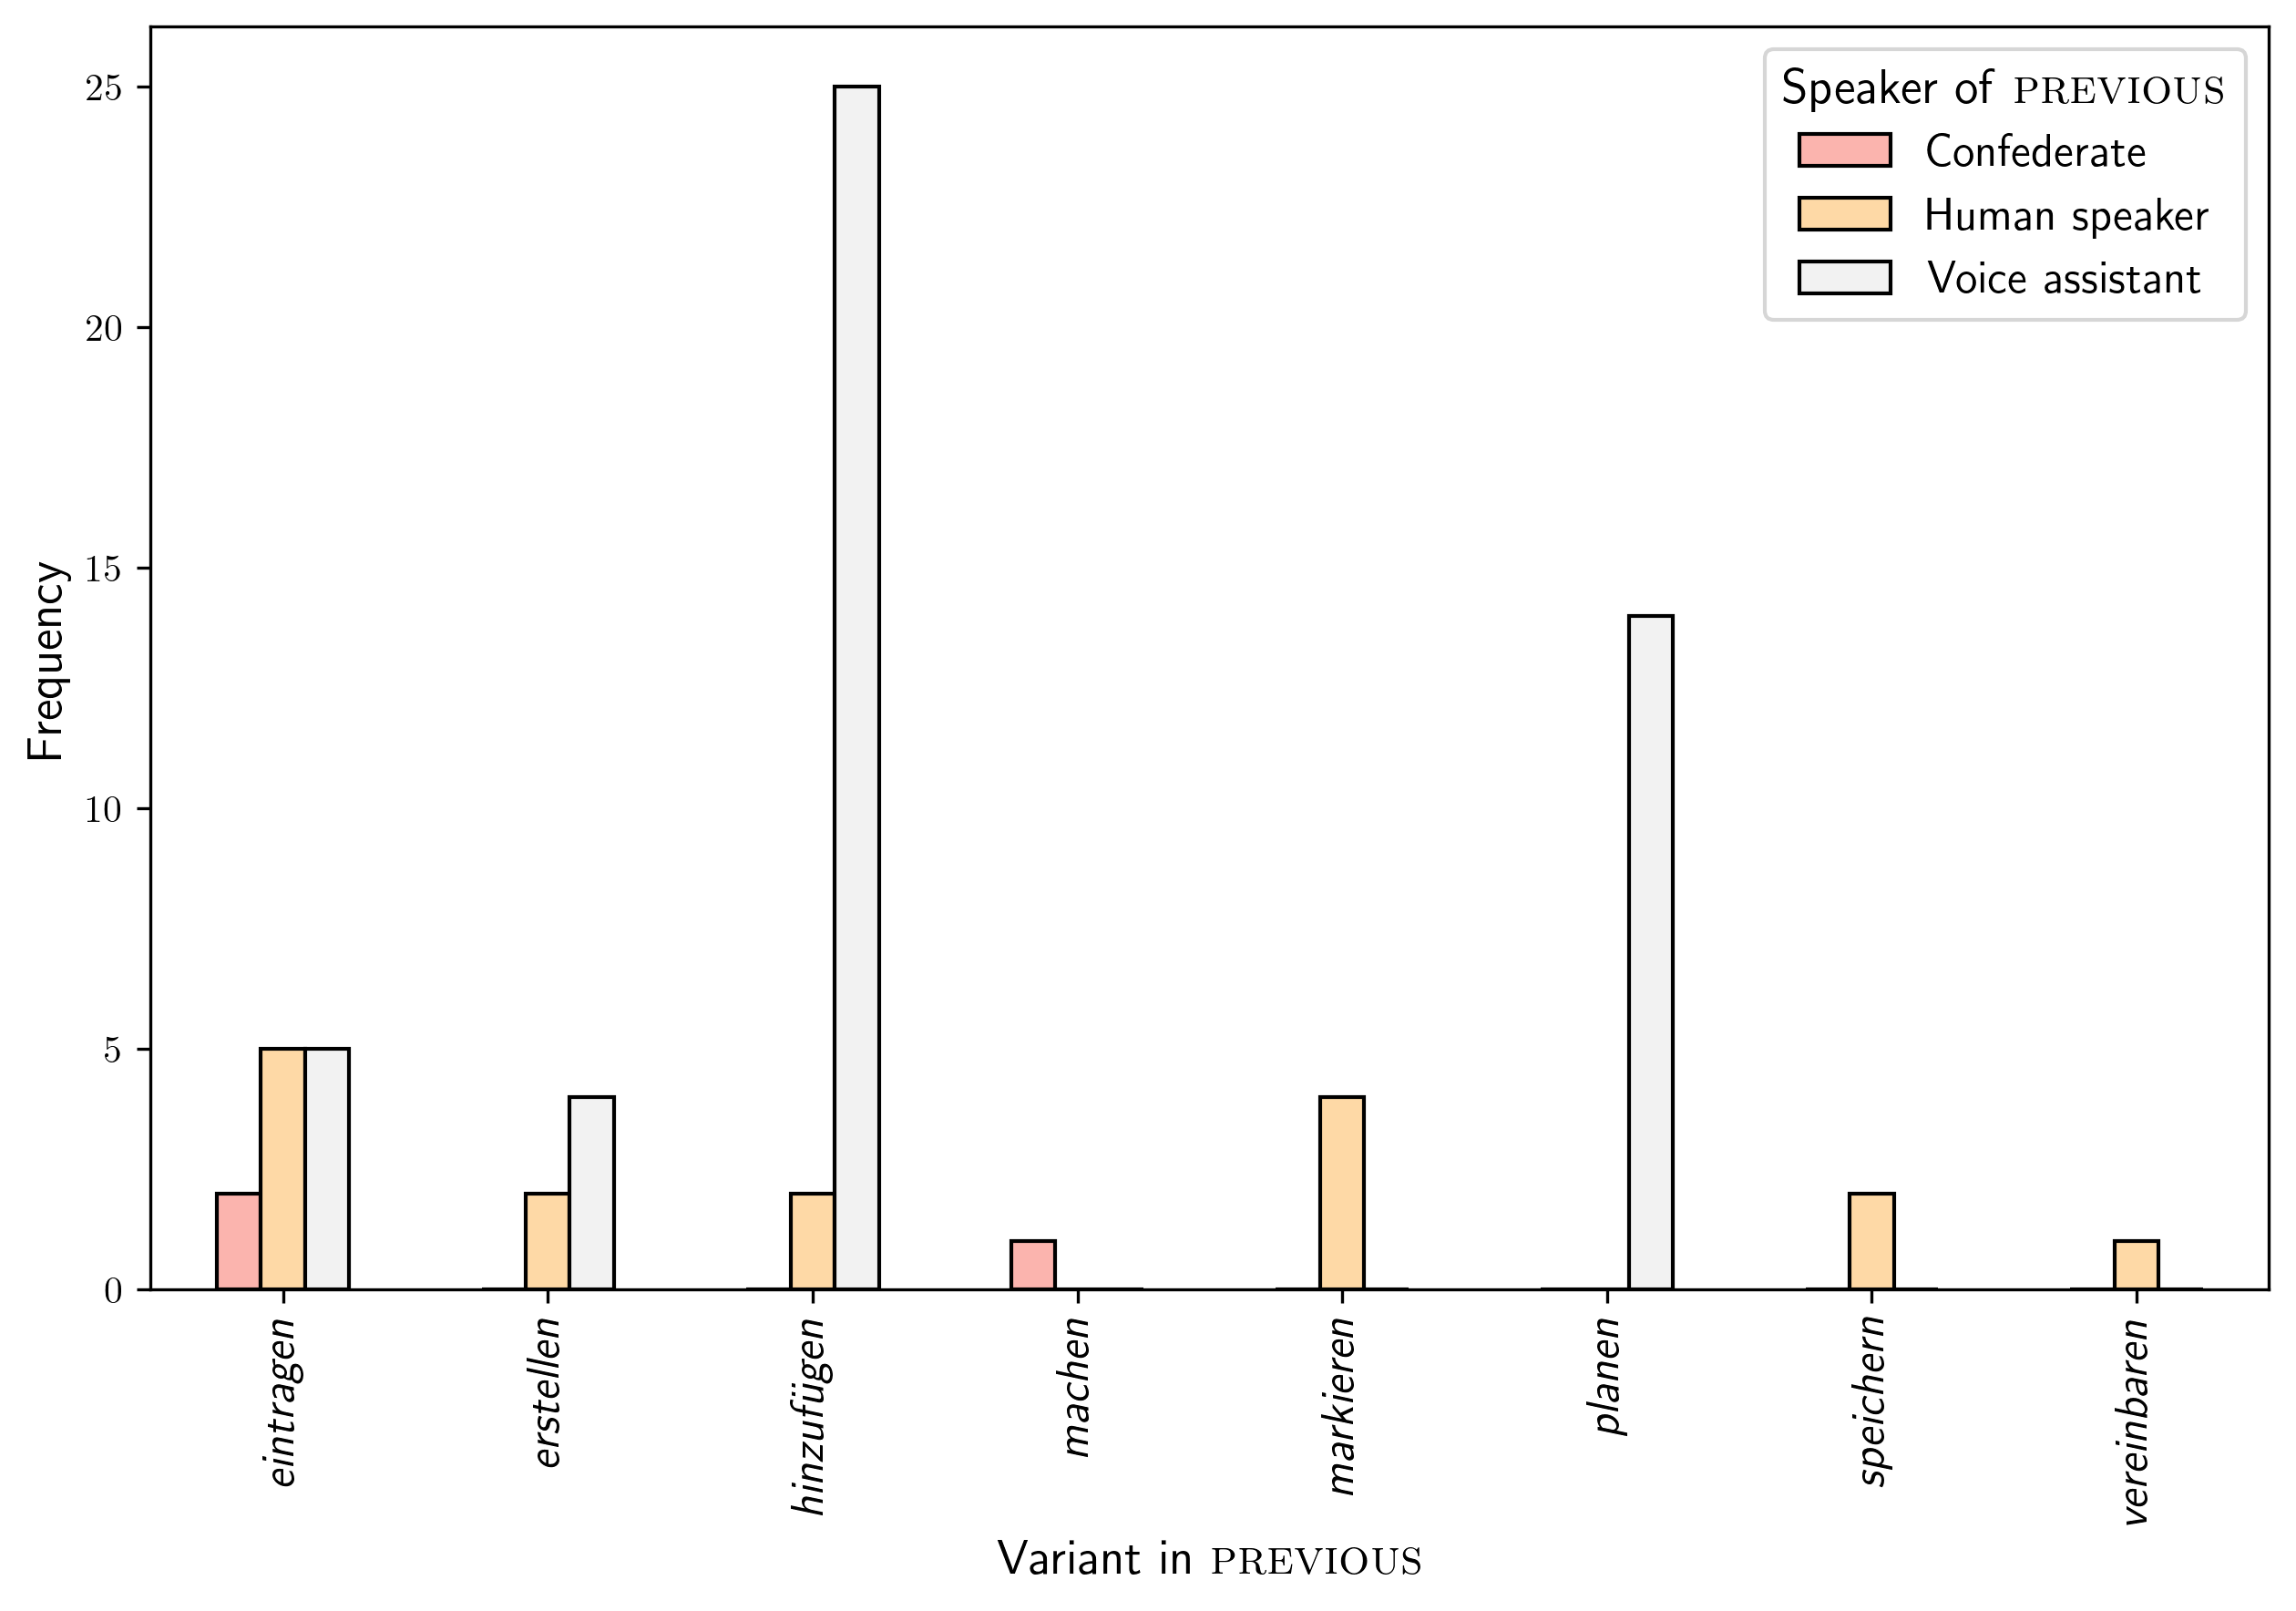

In [37]:
import matplotlib.pyplot as plt, numpy as np
fig, ax = plt.subplots(figsize=(10, 6), dpi=300) 
plt.rcParams['text.usetex'] = True

variation_sample.PREVIOUS_SPEAKER = variation_sample.PREVIOUS_SPEAKER.replace("A", "Voice assistant")
variation_sample.PREVIOUS_SPEAKER = variation_sample.PREVIOUS_SPEAKER.replace("S", "Human speaker")
variation_sample.PREVIOUS_SPEAKER = variation_sample.PREVIOUS_SPEAKER.replace("J", "Confederate")

grouped = variation_sample.groupby("PREVIOUS_SPEAKER").PREVIOUS.value_counts()
grouped = grouped.unstack().fillna(0).T

grouped.plot(kind="bar", ax=ax, colormap="Pastel1", edgecolor="black")

ax.set_xticklabels([r'\textit{' + label.get_text() + '}' for label in ax.get_xticklabels()])

plt.ylabel(r"Frequency", fontsize=13)
plt.xlabel(r"Variant in \textsc{previous}", fontsize=13)
plt.legend(title=r"Speaker of \textsc{previous}", fontsize=12, title_fontsize=13)
plt.xticks(fontsize=12)

plt.show()

fig.savefig("../../../publication/further/images/PREVIOUS_SPEAKER_plot.png", bbox_inches='tight') #'fig'!

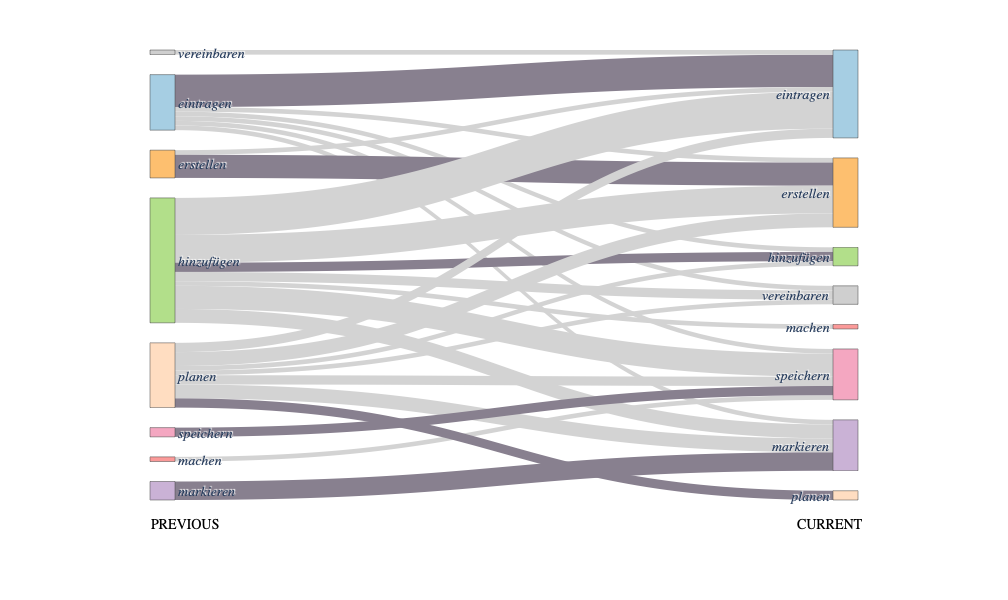

In [44]:
import pandas as pd
import plotly.graph_objects as go

# Aggregate counts
flows = variation_sample.groupby(["PREVIOUS", "CURRENT"]).size().reset_index(name="count")

# Create a unique label list with each verb appearing twice (left and right side)
unique_verbs = sorted(set(flows["PREVIOUS"]).union(set(flows["CURRENT"])))
labels = [f"<i>{verb}</i> " for verb in unique_verbs] + [f"<i>{verb}</i>" for verb in unique_verbs]

# Assign stronger pastel colors
pastel_colors = [
    "#A6CEE3", "#FDBF6F", "#B2DF8A", "#FB9A99", "#CAB2D6",
    "#FFDDC1", "#F4A7C1", "#CFCFCF", "#FFFF99", "#B0E0E6"
]
verb_colors = {verb: pastel_colors[i % len(pastel_colors)] for i, verb in enumerate(unique_verbs)}

# Map labels to indices
label_map = {label: i for i, label in enumerate(labels)}

# Define node colors (matching left and right)
node_colors = [verb_colors[verb.strip("<i></i>")] for verb in unique_verbs] * 2

# Identify self-loops
link_colors = ["#88808F" if prev == curr else "lightgray" for prev, curr in zip(flows["PREVIOUS"], flows["CURRENT"])]

# Adjust node positions to prevent skewing
y_positions = [i / len(unique_verbs) for i in range(len(unique_verbs))]
x_positions = [0] * len(unique_verbs) + [1] * len(unique_verbs)

# Create Sankey diagram
fig = go.Figure(go.Sankey(
    arrangement="snap",
    node=dict(
        label=labels,
        pad=20, thickness=25, color=node_colors,
        x=x_positions, y=y_positions  # Adjust positions to prevent cutoffs
    ),
    link=dict(
        source=[label_map[f"<i>{prev}</i> "] for prev in flows["PREVIOUS"]],
        target=[label_map[f"<i>{curr}</i>"] for curr in flows["CURRENT"]],
        value=flows["count"].tolist(),
        color=link_colors
    )
))

# Adjust figure size and margins
fig.update_layout(
    font=dict(size=14, family="Serif"),  # Ensuring LaTeX-style font
    width=1000,  # Narrower
    height=600,  # Taller to avoid cutoff
    margin=dict(l=150, r=150, t=50, b=100)  # More space for labels
)

fig.update_layout(
    annotations=[
        dict(
            x=0.05, y=-0.08, text="<span style='font-variant: small-caps;'>previous</span>", 
            showarrow=False, font=dict(size=20, color="black"), xanchor="center"
        ),
        dict(
            x=0.96, y=-0.08, text="<span style='font-variant: small-caps;'>current</span>", 
            showarrow=False, font=dict(size=20, color="black"), xanchor="center"
        )
    ]
)

# Get unique verb positions from the label list
previous_positions = {verb: i / len(unique_verbs) for i, verb in enumerate(sorted(flows["PREVIOUS"].unique()))}
current_positions = {verb: i / len(unique_verbs) for i, verb in enumerate(sorted(flows["CURRENT"].unique()))}

# Export high-resolution PNG
fig.write_image("../../../publication/further/images/sankey_plot_SCHEDULE.png", scale=4)

fig.show()